In [2]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 2s 1us/step


In [8]:
import numpy as np
"원핫 인코딩. 정수 시퀀스를 이진 행렬로 인코딩"
def vectorize_squence(sequence, dimension = 10000):
    results = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence) :
        results[i, sequence] = 1.
        
    return results


In [9]:
x_train = vectorize_squence(train_data)
y_train = vectorize_squence(test_data)

In [15]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels) :
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [26]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
"위의 to_one_hot()함수와 동일하다. to_categorical()함수는 케라스에 내장되어있다."


'위의 to_one_hot()함수와 동일하다. to_categorical()함수는 케라스에 내장되어있다.'

In [33]:
from keras import models
from keras import layers

model = models.Sequential()
"IMDB와는 다르게 46개의 분류를 진행해야 하므로 16차원 출력은 너무 작다. 따라서 64차원을 출력한다"
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
"46개 분류이므로 각 46개의 출력을 가진다."
"softmax 함수를 사용하여 output[i]가  클래스 i에 속할 확률을 보여준다. 여기서 46개의 클래스를 모두 더하면 1이된다."
model.add(layers.Dense(46, activation = 'softmax'))



In [34]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [35]:
x_val = x_train[:1000]
"0번부터 999번까지 1000개의 데이터를 검증용으로 사용"
partial_x_train = x_train[1000:]
"1000번부터 끝까지를 훈련용으로 사용"


y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [36]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 244us/step - loss: 2.5296 - accuracy: 0.5307 - val_loss: 1.6778 - val_accuracy: 0.6220
Epoch 2/20
7982/7982 [==============================] - 1s 185us/step - loss: 1.3745 - accuracy: 0.7002 - val_loss: 1.3109 - val_accuracy: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 184us/step - loss: 1.0248 - accuracy: 0.7779 - val_loss: 1.1409 - val_accuracy: 0.7620
Epoch 4/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.7973 - accuracy: 0.8344 - val_loss: 1.0435 - val_accuracy: 0.7900
Epoch 5/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.6279 - accuracy: 0.8710 - val_loss: 0.9750 - val_accuracy: 0.7980
Epoch 6/20
7982/7982 [==============================] - 2s 192us/step - loss: 0.5019 - accuracy: 0.8975 - val_loss: 0.9301 - val_accuracy: 0.8060
Epoch 7/20
7982/7982 [==============================] - 1s 184us/step - loss

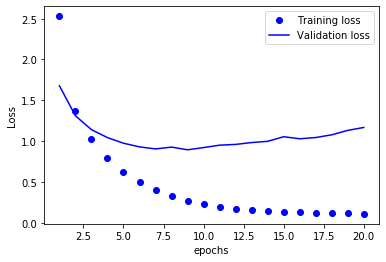

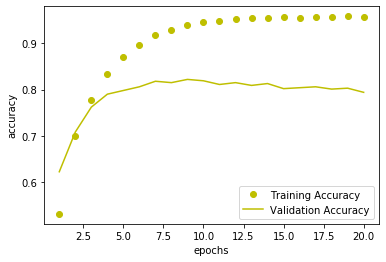

In [38]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc ,'y', label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [40]:
"9번째 Epoch부터 Overfitting이 시작됨. 따라서 9번의 Epochs만 주고 다시 만들어봄"
model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))

"test_data로 모델 평가"
results = model.evaluate(y_train,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 222us/step - loss: 2.7420 - accuracy: 0.5053 - val_loss: 1.7722 - val_accuracy: 0.6580
Epoch 2/9
7982/7982 [==============================] - 2s 194us/step - loss: 1.4220 - accuracy: 0.7085 - val_loss: 1.2974 - val_accuracy: 0.7130
Epoch 3/9
7982/7982 [==============================] - 2s 190us/step - loss: 1.0227 - accuracy: 0.7888 - val_loss: 1.1093 - val_accuracy: 0.7680
Epoch 4/9
7982/7982 [==============================] - 2s 193us/step - loss: 0.7934 - accuracy: 0.8409 - val_loss: 1.0056 - val_accuracy: 0.7970
Epoch 5/9
7982/7982 [==============================] - 1s 176us/step - loss: 0.6264 - accuracy: 0.8718 - val_loss: 0.9683 - val_accuracy: 0.8010
Epoch 6/9
7982/7982 [==============================] - 1s 181us/step - loss: 0.5011 - accuracy: 0.8970 - val_loss: 0.9185 - val_accuracy: 0.8050
Epoch 7/9
7982/7982 [==============================] - 2s 190us/step - loss: 0.406

In [42]:
results

[1.0073538794649146, 0.7871772050857544]

In [51]:
predictions = model.predict(y_train)

"0번째 문장을 46개의 클래스로 분류 하였을 때 각 클래스의 확률"
print(predictions[0])
"46개의 클래스의 확률을 모두 더하면 1이다."
print(np.sum(predictions[0]))
"0번째 문장이 속해 있는 클래스는 3번째 클래스이다. 이유는 46개의 클래스들 중 가장 확률이 높게 나왔기 때문"
print(np.argmax(predictions[0]))

[7.0043003e-05 3.2629997e-03 9.3653551e-05 9.4477075e-01 3.9951630e-02
 6.3519452e-05 2.4750228e-05 2.5531284e-05 6.4736913e-04 1.1985020e-04
 1.5265335e-04 2.4610513e-03 3.9852783e-04 9.8013297e-05 2.3590981e-04
 2.3579723e-05 3.6589894e-04 4.0359161e-04 9.7662687e-06 1.0348876e-03
 2.5207738e-03 6.0891744e-04 1.4318727e-04 2.3834944e-04 1.7034741e-05
 6.0491155e-05 2.1392661e-06 5.2610462e-06 3.7165730e-05 3.6194231e-04
 1.1614878e-05 1.0590874e-04 5.2173698e-05 2.9437824e-05 9.3306582e-05
 4.6133362e-05 2.9522914e-04 1.6164293e-05 7.8386001e-06 7.9925318e-04
 2.0986675e-04 5.6419995e-05 5.3443928e-05 5.4082079e-06 4.6578248e-06
 3.8552134e-06]
1.0000001
3
